# Assignment 8

## Using Dataset 5

In [11]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
import matplotlib.pyplot as plt
import PyQt5
from random import sample, seed
import seaborn as sns
import itertools
import os
import math
from collections import defaultdict
import sys


import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from bokeh.io import output_notebook, show
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [2]:
facebook_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Facebook-Ego/686.edges"
twitter_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Twitter-Ego/1435461.edges"

In [3]:
# Load the /.edges files

# Facebook is an undirected network
graphFacebook = nx.read_edgelist(facebook_edges_filepath, create_using=nx.Graph())

# Twitter is a directed network
graphTwitter = nx.read_edgelist(twitter_edges_filepath, create_using=nx.DiGraph())

In [4]:
# Basic attributes check
print("Number of nodes = {}, edges = {} in facebook graph.".format(graphFacebook.number_of_nodes(), graphFacebook.number_of_edges()))
print("Number of nodes = {}, edges = {} in Twitter graph.".format(graphTwitter.number_of_nodes(), graphTwitter.number_of_edges()))

Number of nodes = 168, edges = 1656 in facebook graph.
Number of nodes = 129, edges = 8037 in Twitter graph.


## Question A

### The Sznajd model is a variant of spin model employing the theory of social impact, which takes into account the fact that a group of individuals with the same opinion can influence their neighbours more than one single individual. Please use the Sznajd model to simulate the cascade of misinformation based on Facebook-Ego datasets with different initial ”infected” numbers: 5, 15, and 30. Please visualize the results and output a prevalence plot.

In [29]:
# Create a function to answer question A
def sznajd_model(initial_infected_rate, number_iterations):
    """_summary_
    simulate sznajd model and plot the results as well as the prevalence.
    Args:
        initial_infected_rate (_type_): initial infected rate
    """
    no_nodes = graphFacebook.number_of_nodes() # total number of nodes
    rate = initial_infected_rate / no_nodes # initial infected rate since we have to provide it as a value between (0, 1)

    # Model selection
    model = op.SznajdModel(graphFacebook)
    config = mc.Configuration()
    config.add_model_parameter('fraction_infected', rate)

    model.set_initial_status(config)

    # Simulation execution
    iterations = model.iteration_bunch(number_iterations)
    trends = model.build_trends(iterations)
    
    %matplotlib inline
    # visualize the result
    viz = DiffusionTrend(model, trends)
    p = viz.plot()
    
    %matplotlib inline
    # prevalence plot
    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot()
    
    return

5 initial infected nodes


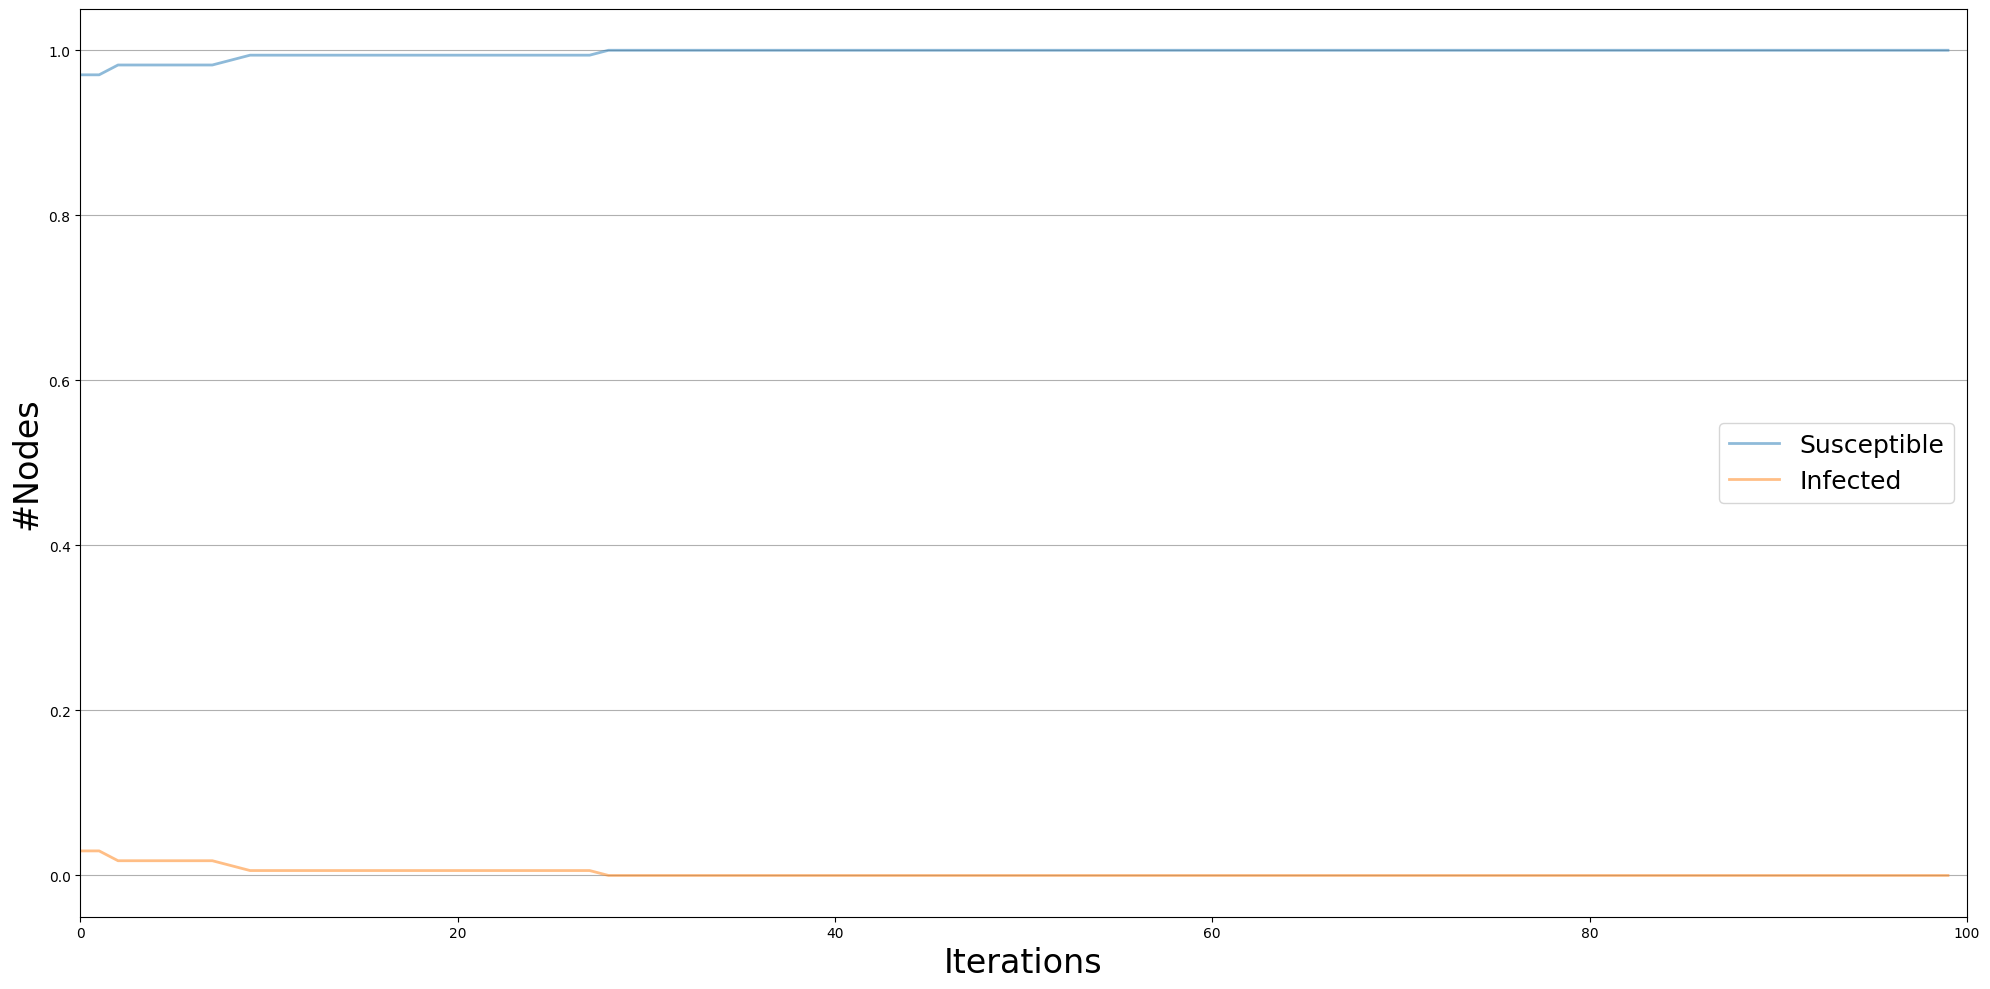

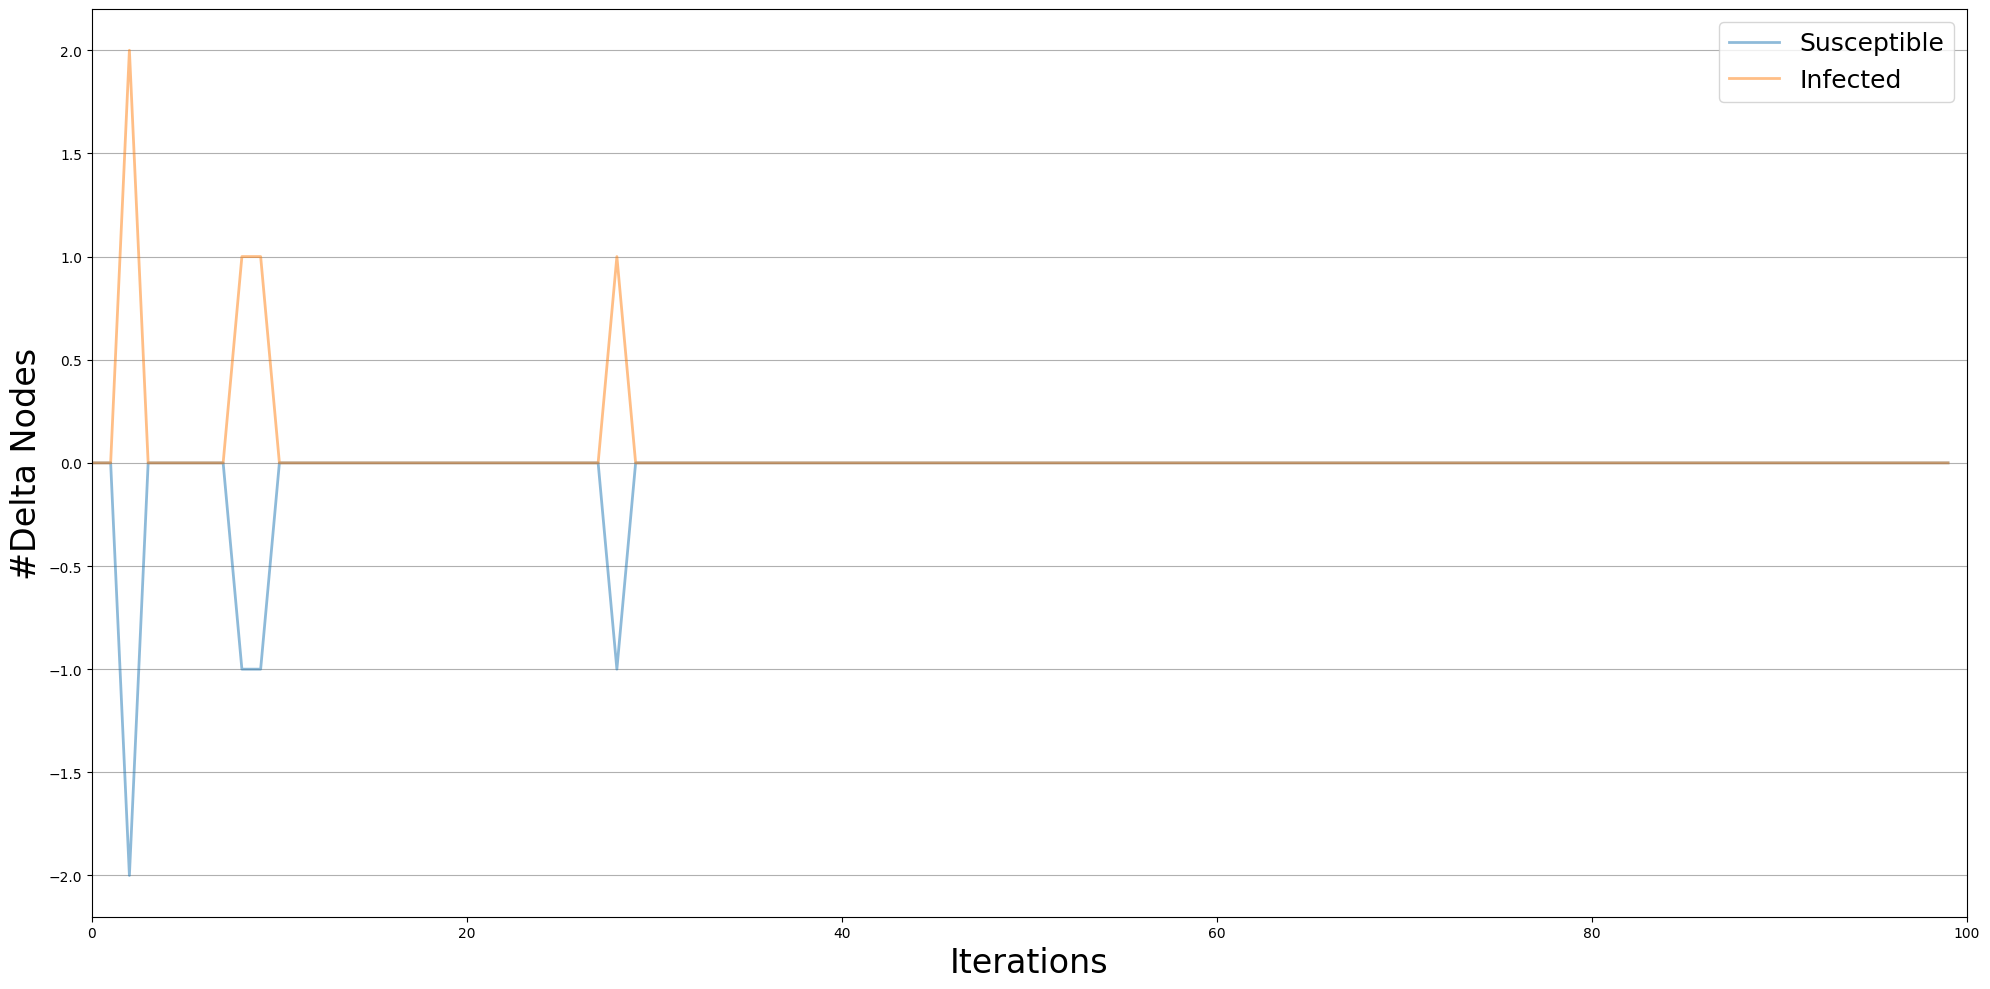

In [31]:
# For initial infected number: 5
print("5 initial infected nodes")
sznajd_model(5, 100)

15 initial infected nodes


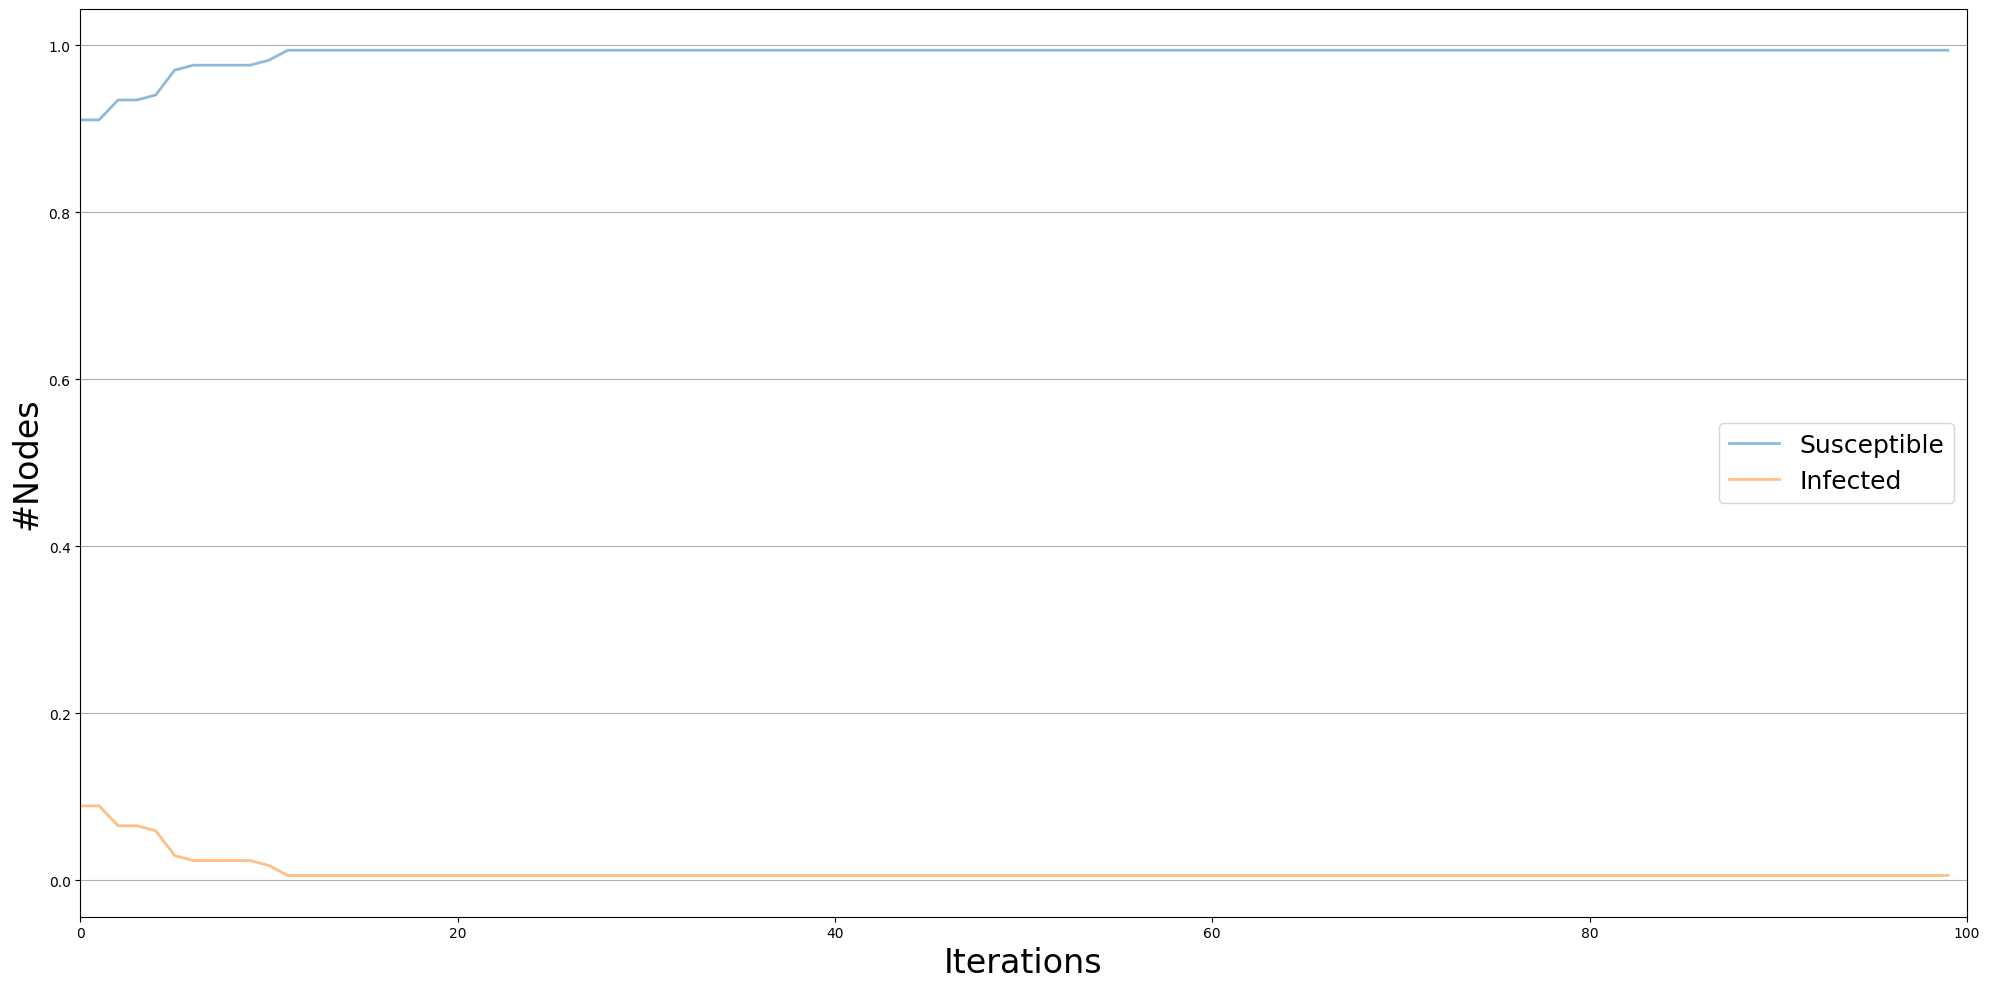

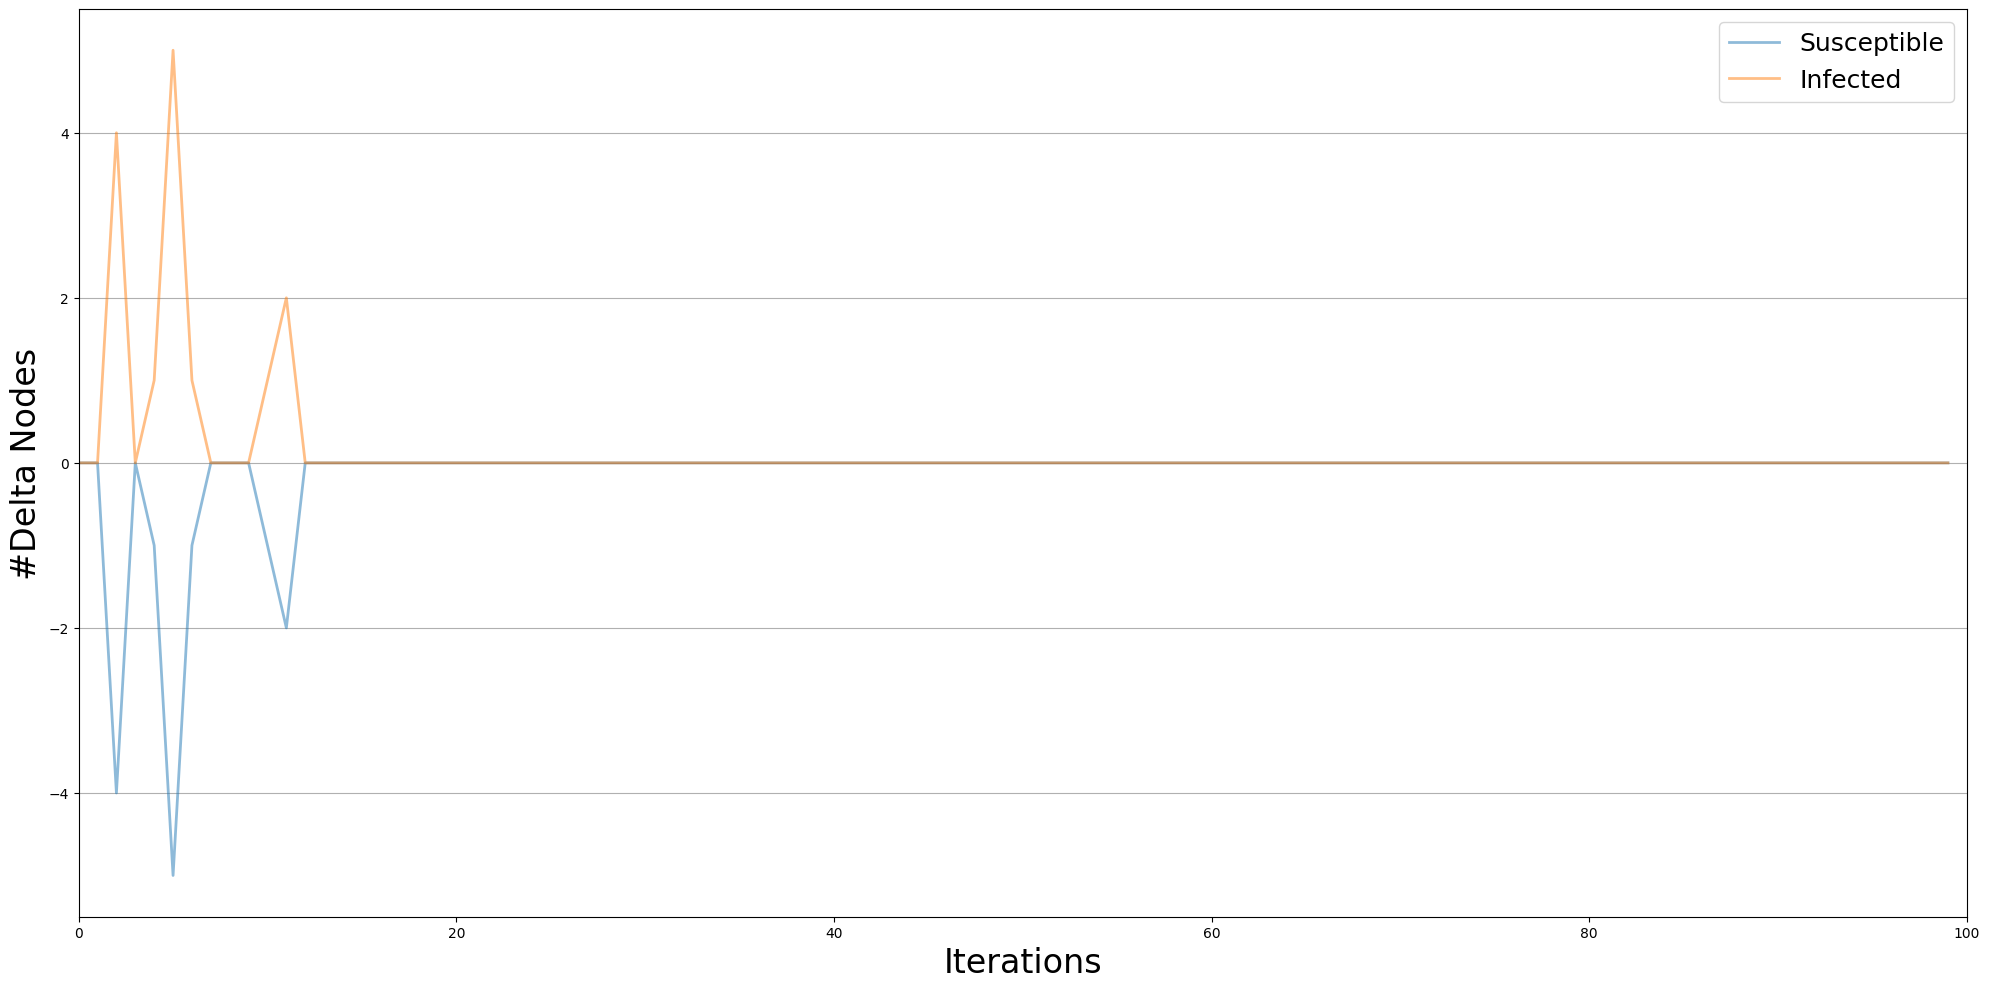

In [32]:
# For initial infected number: 15
print("15 initial infected nodes")
sznajd_model(15, 100)

30 initial infected nodes


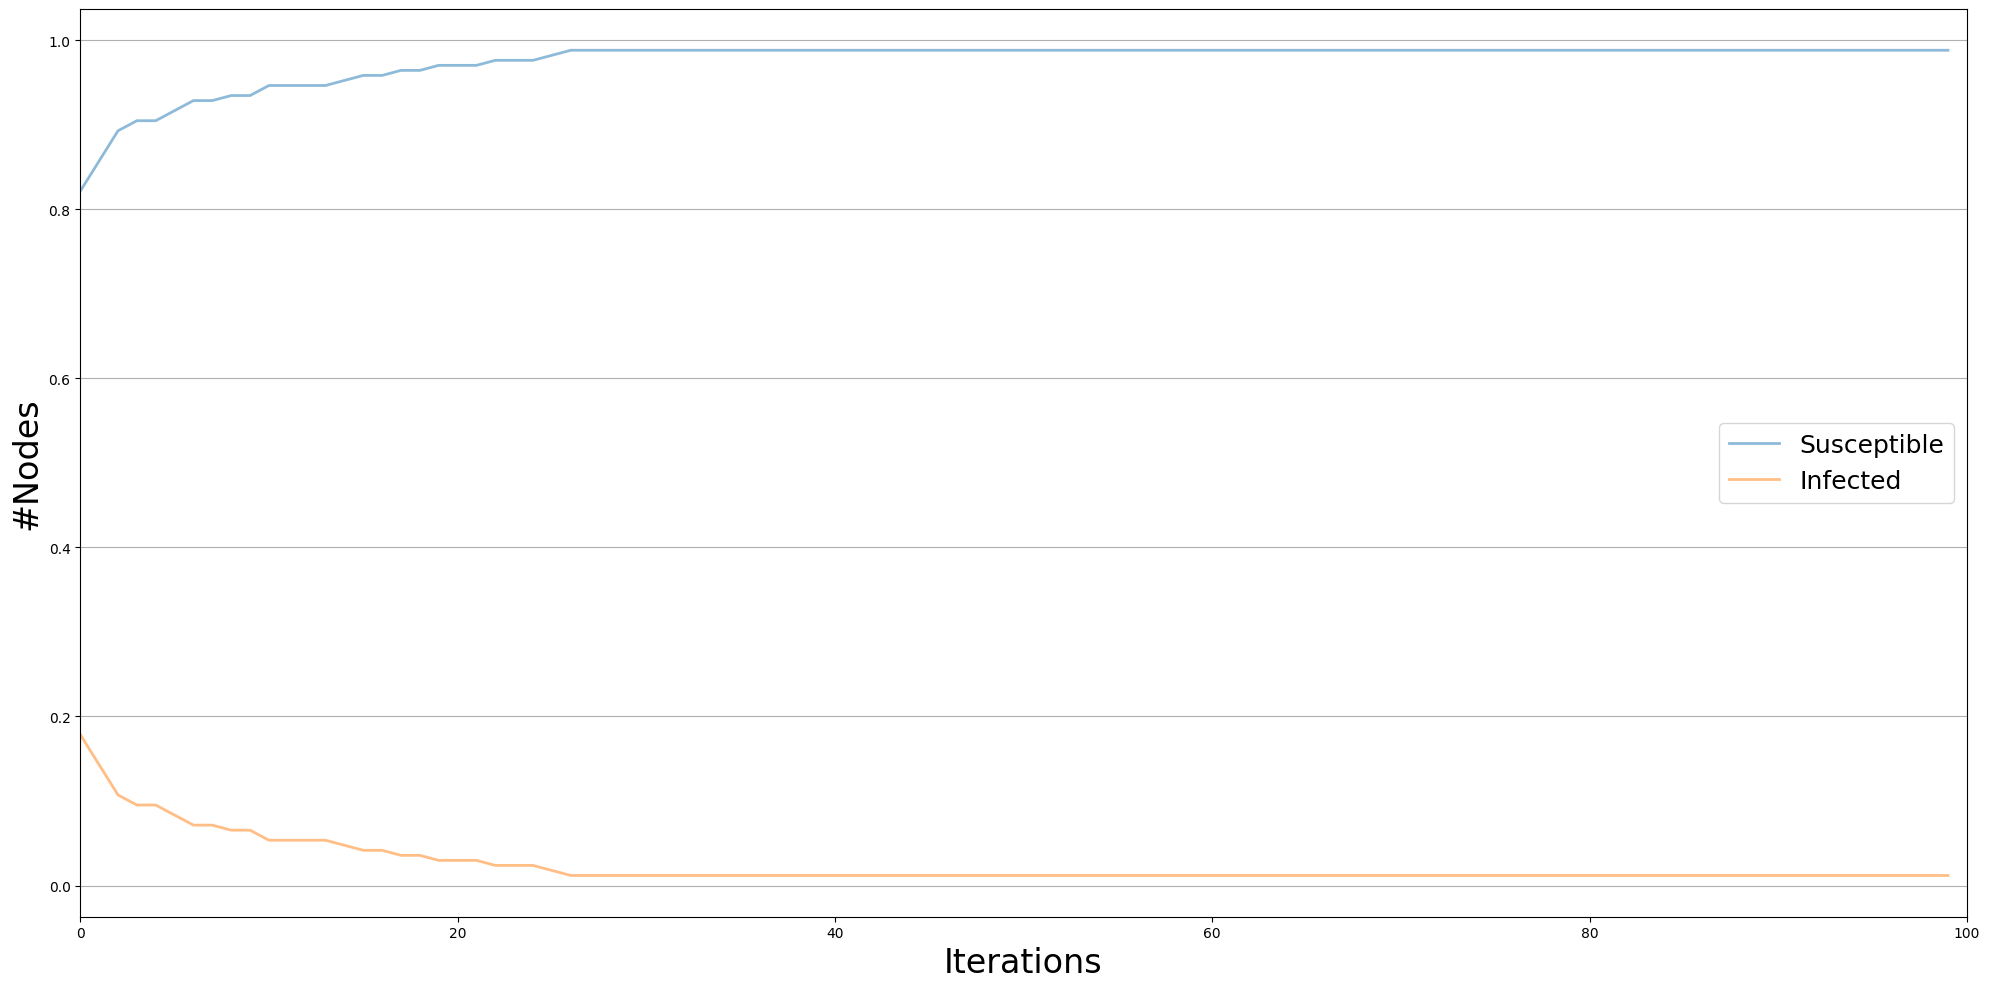

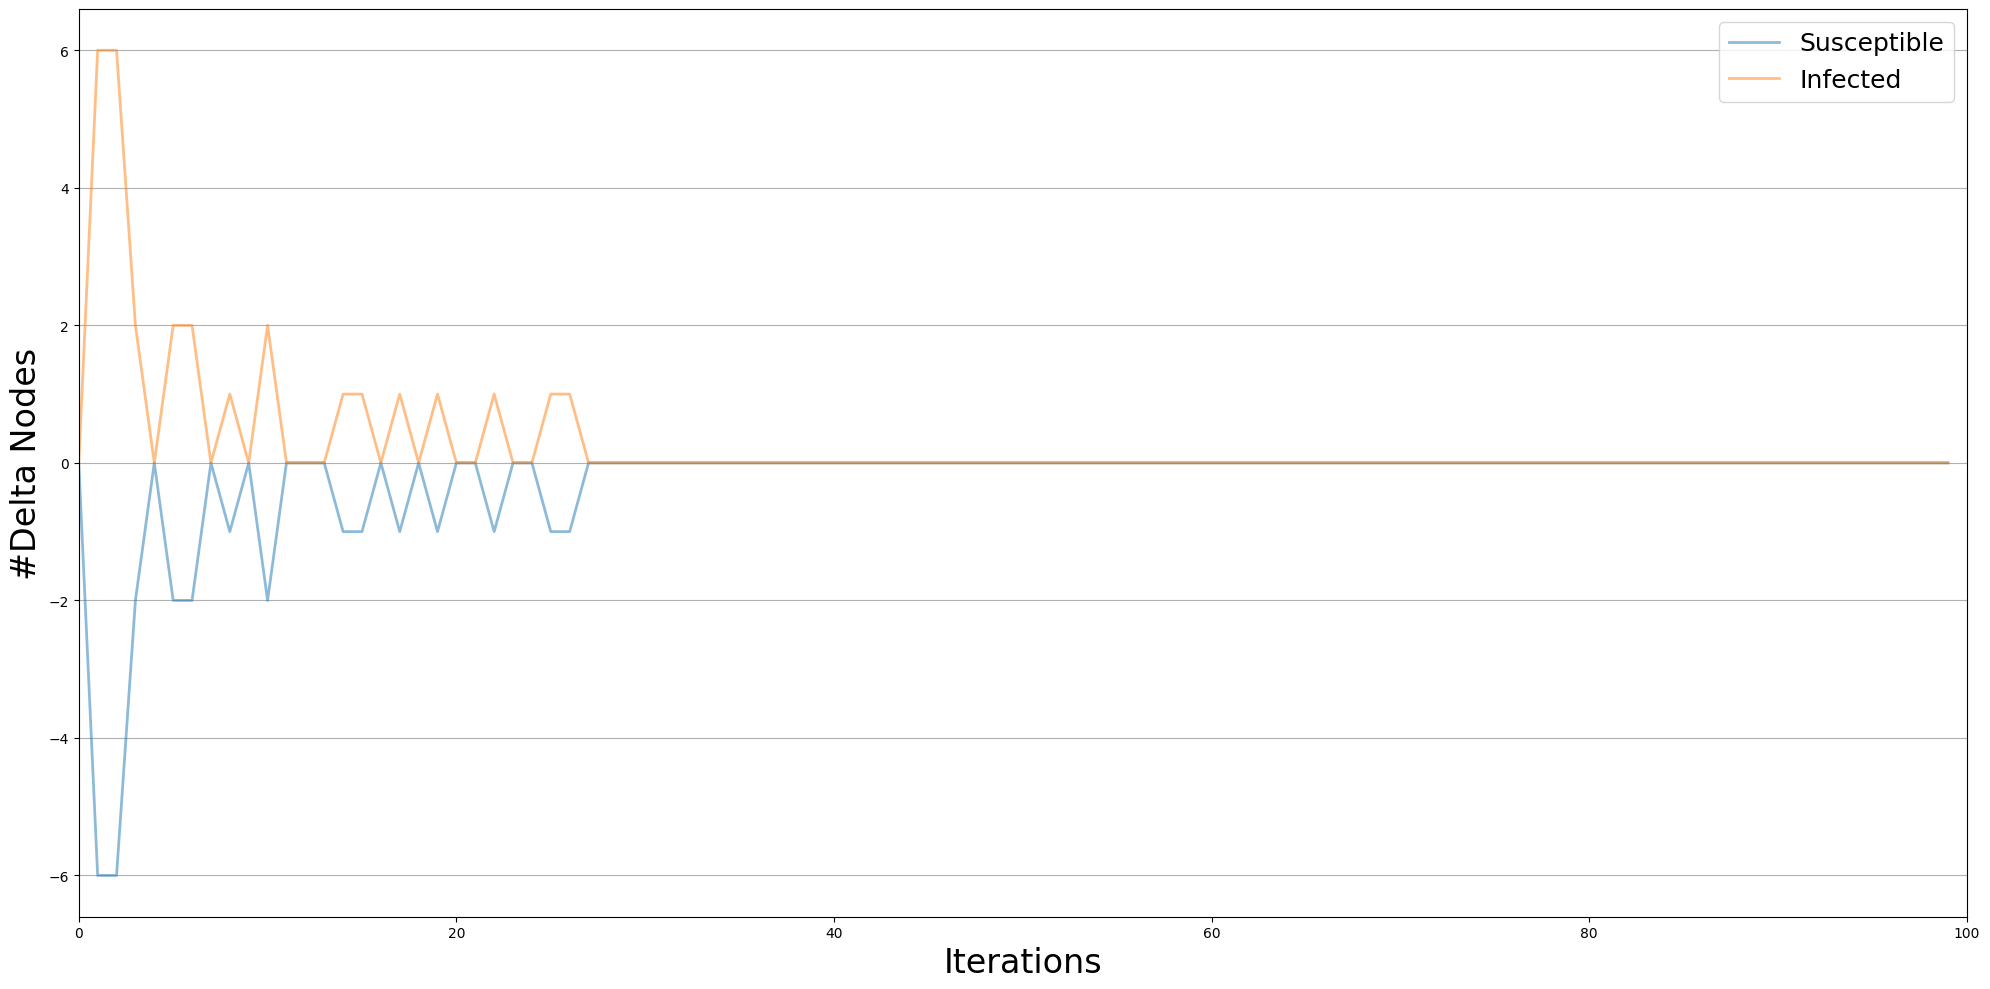

In [33]:
# For initial infected number: 30
print("30 initial infected nodes")
sznajd_model(30, 100)